In [ ]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
#Import Libaries
import pandas as pd
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Cleaning data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [ ]:
df.groupby("job_title_short")["salary_year_avg"].agg(["min","max","median","count"]).sort_values(by="min",ascending=True)

,min,max,median,count
job_title_short,,,,
Data Engineer,15000.0,525000.0,125000.0,4500
Business Analyst,16500.0,387460.0,85000.0,610
Data Analyst,25000.0,650000.0,90000.0,5451
Data Scientist,27000.0,960000.0,127500.0,5922
Software Engineer,28000.0,375000.0,99150.0,467
Machine Learning Engineer,30000.0,325000.0,106415.0,576
Senior Data Analyst,30000.0,425000.0,111175.0,1131
Senior Data Engineer,35000.0,425000.0,147500.0,1591
Cloud Engineer,42000.0,280000.0,90000.0,65


In [ ]:
lux_jobs = df[df["job_country"] == "Luxembourg"]

In [ ]:
lux_jobs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 178 to 785593
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        2206 non-null   object        
 1   job_title              2206 non-null   object        
 2   job_location           2206 non-null   object        
 3   job_via                2206 non-null   object        
 4   job_schedule_type      2182 non-null   object        
 5   job_work_from_home     2206 non-null   bool          
 6   search_location        2206 non-null   object        
 7   job_posted_date        2206 non-null   datetime64[ns]
 8   job_no_degree_mention  2206 non-null   bool          
 9   job_health_insurance   2206 non-null   bool          
 10  job_country            2206 non-null   object        
 11  salary_rate            13 non-null     object        
 12  salary_year_avg        13 non-null     float64       
 13  sala

In [ ]:
lux_jobs.groupby("job_via")["salary_year_avg"].agg(["count"]).sort_values("count",ascending=False)

,count
job_via,
via Ai-Jobs.net,13
via ACCA Careers - ACCA Global,0
via POST - POST Group,0
via Rocket Crew,0
via Recruit.net,0
...,...
via Infeurope S.A.,0
via Indev Jobs,0
via Indeed,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
jobs = df.groupby("job_title_short")["salary_year_avg"].median().sort_values()

<function matplotlib.pyplot.show(close=None, block=None)>

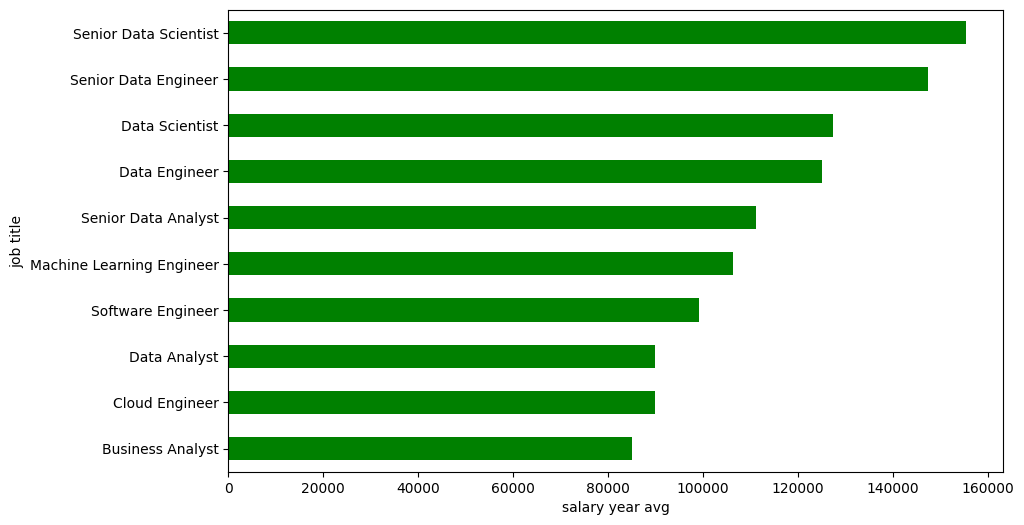

In [ ]:

jobs.plot.barh(figsize=(10,6),color="Green")
plt.xlabel("salary year avg")
plt.ylabel("job title")


plt.show